## Black Friday
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [20,12]

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((550068, 12), (233599, 11))

In [4]:
com = pd.concat([train,test],ignore_index = False)
com.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
com.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
com.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [7]:
# Describe
com.describe(include='all')

# Popular Product Id : P00265242
# Frequency of buying is more for males
# Most Buying is coming from 26-35 age bracket
# Most of the buyers are coming from city cat B
# On avg people stay for 1 year in the current city
# Min Purchase is of 12 dollars & Max is 23961 dollars


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


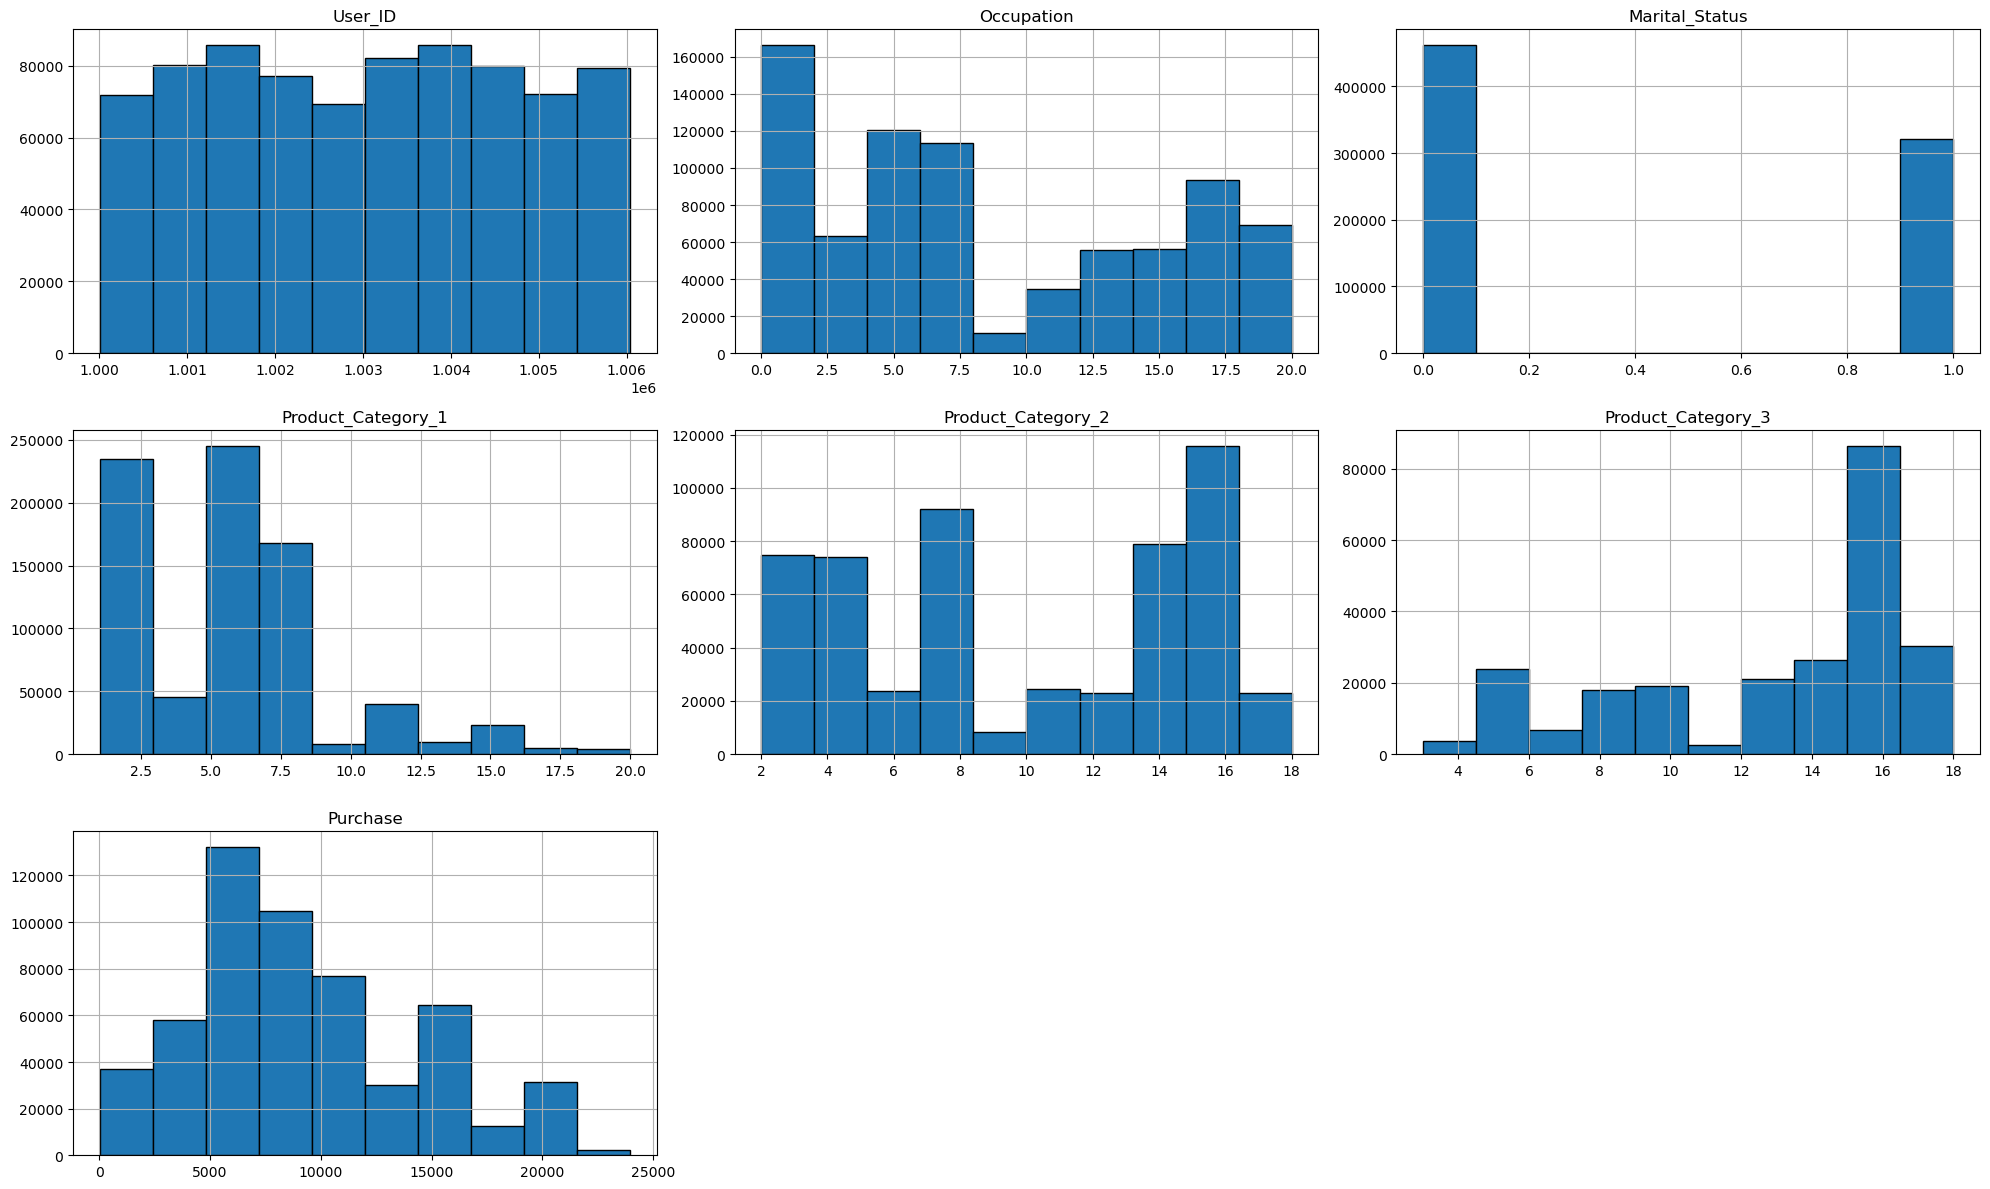

In [8]:
#Num vs num
com.hist(edgecolor='black')
plt.tight_layout()
plt.show()

Index(['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00046742'], dtype='object')


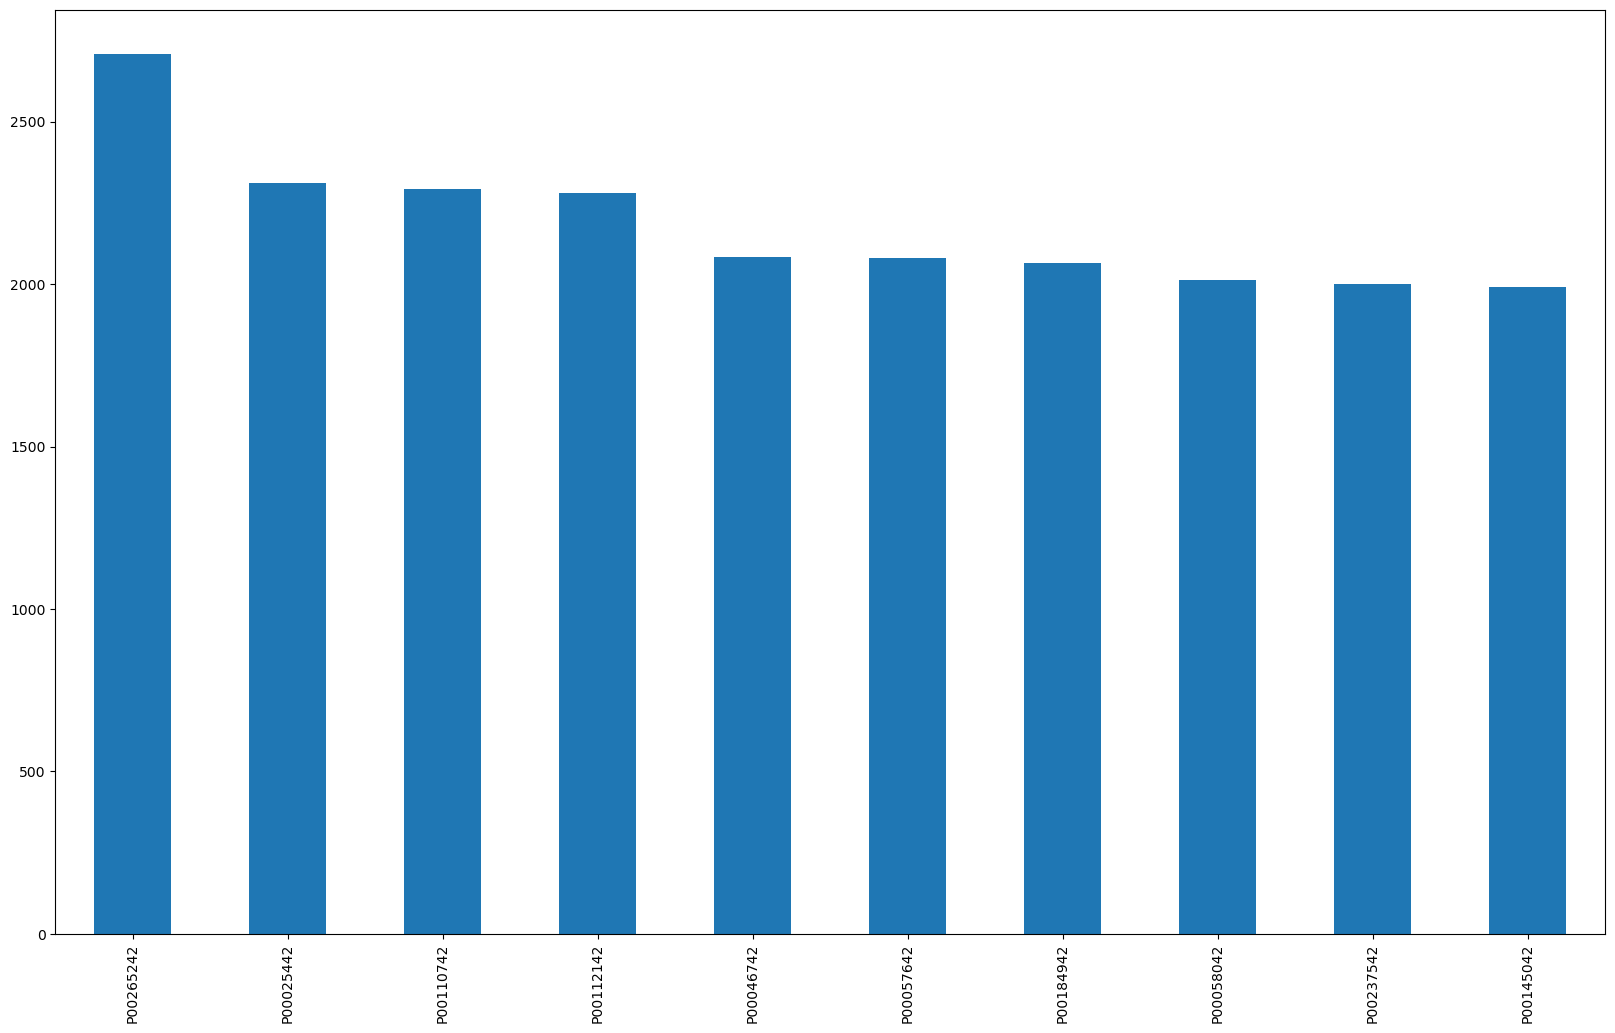

In [9]:
# Top 10 Product IDs
print(com.Product_ID.value_counts()[:5].index)
com.Product_ID.value_counts()[:10].plot(kind='bar')
plt.show()

In [10]:
com.Product_ID.value_counts().sort_values(ascending=False).head()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
Name: Product_ID, dtype: int64

In [11]:
prods = ['P00265242','P00025442','P00110742','P00112142','P00046742']

def prod_cat(x):
    if x in prods:
        return('Top5')
    else:
        return('Others')
com['Product_cat'] = com.Product_ID.apply(prod_cat)

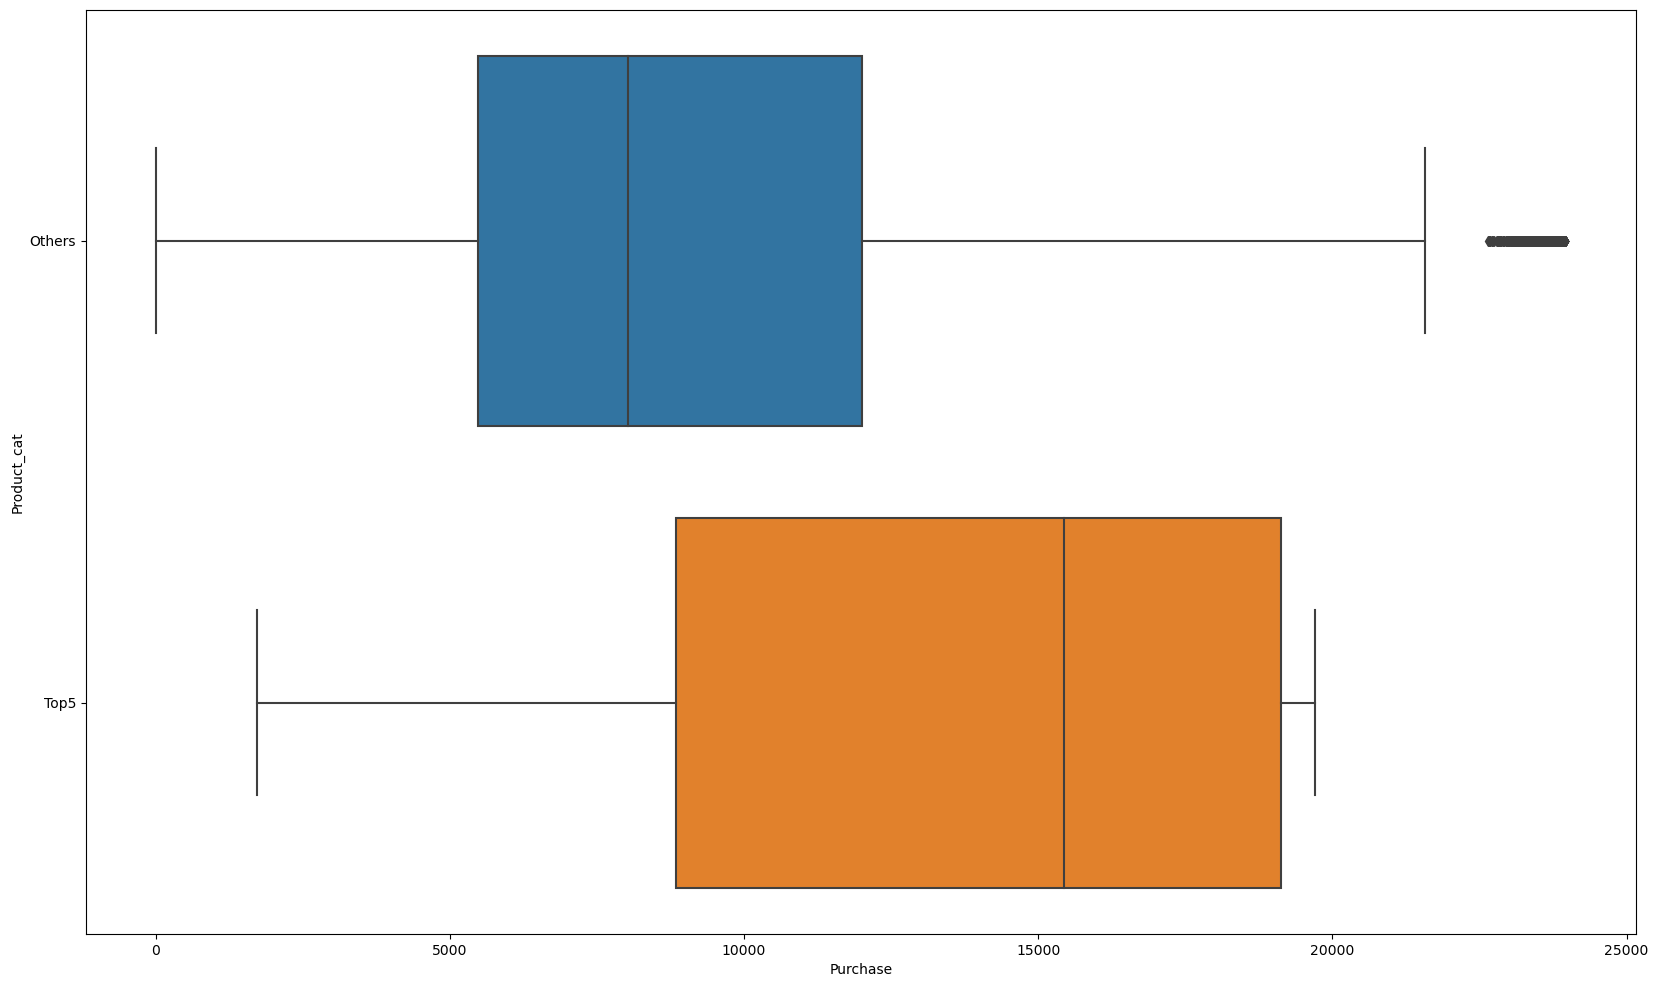

In [12]:
# Target vs Product cat
sns.boxplot(com['Purchase'],com['Product_cat'])
plt.show()

<AxesSubplot:>

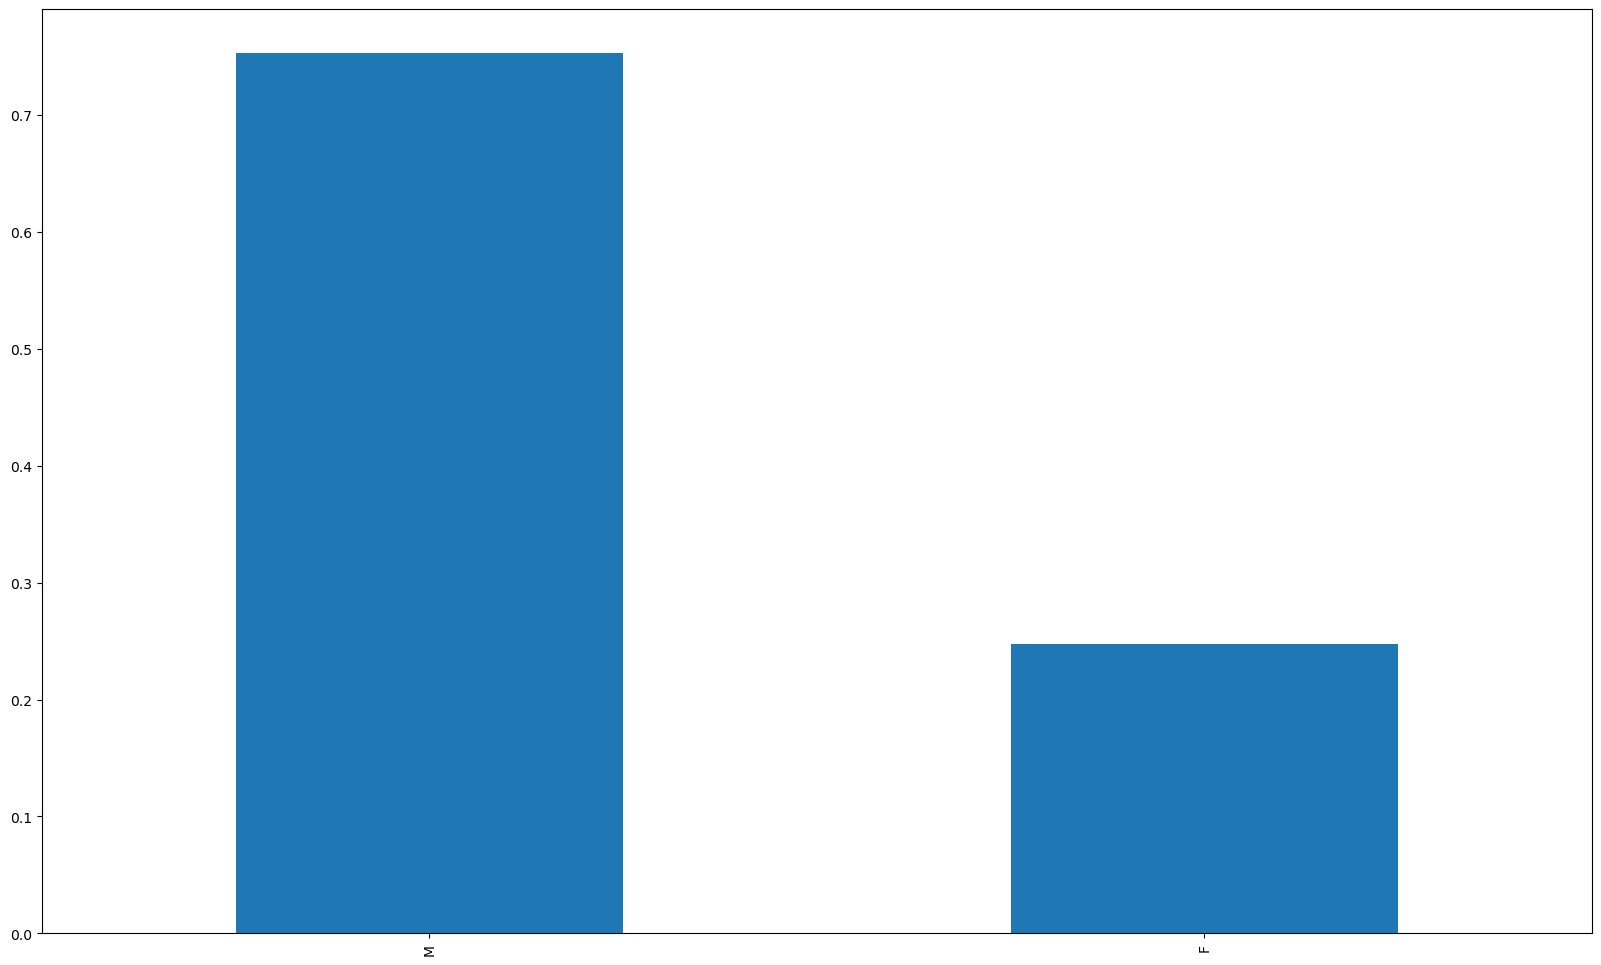

In [13]:
#Gender and Age
com.Gender.value_counts(normalize=True).plot(kind='bar')

26-35    0.399423
36-45    0.199988
18-25    0.181139
46-50    0.083298
51-55    0.069907
55+      0.039020
0-17     0.027223
Name: Age, dtype: float64


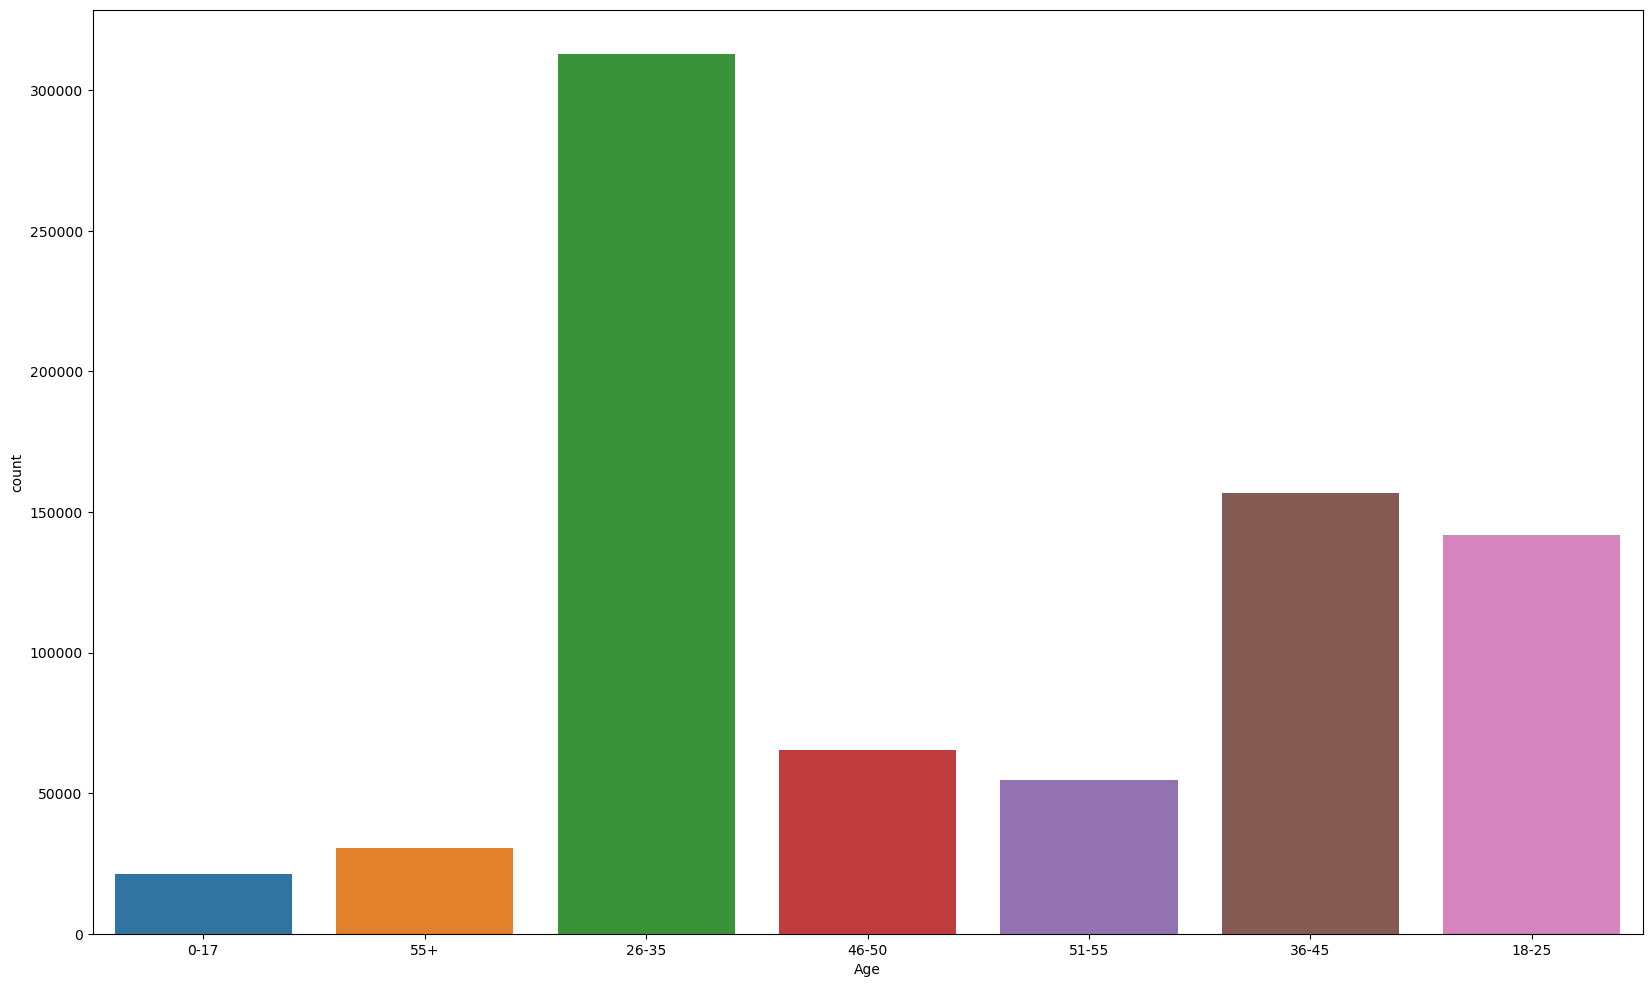

In [14]:
print(com.Age.value_counts(normalize=True))
sns.countplot(com.Age)
plt.show()

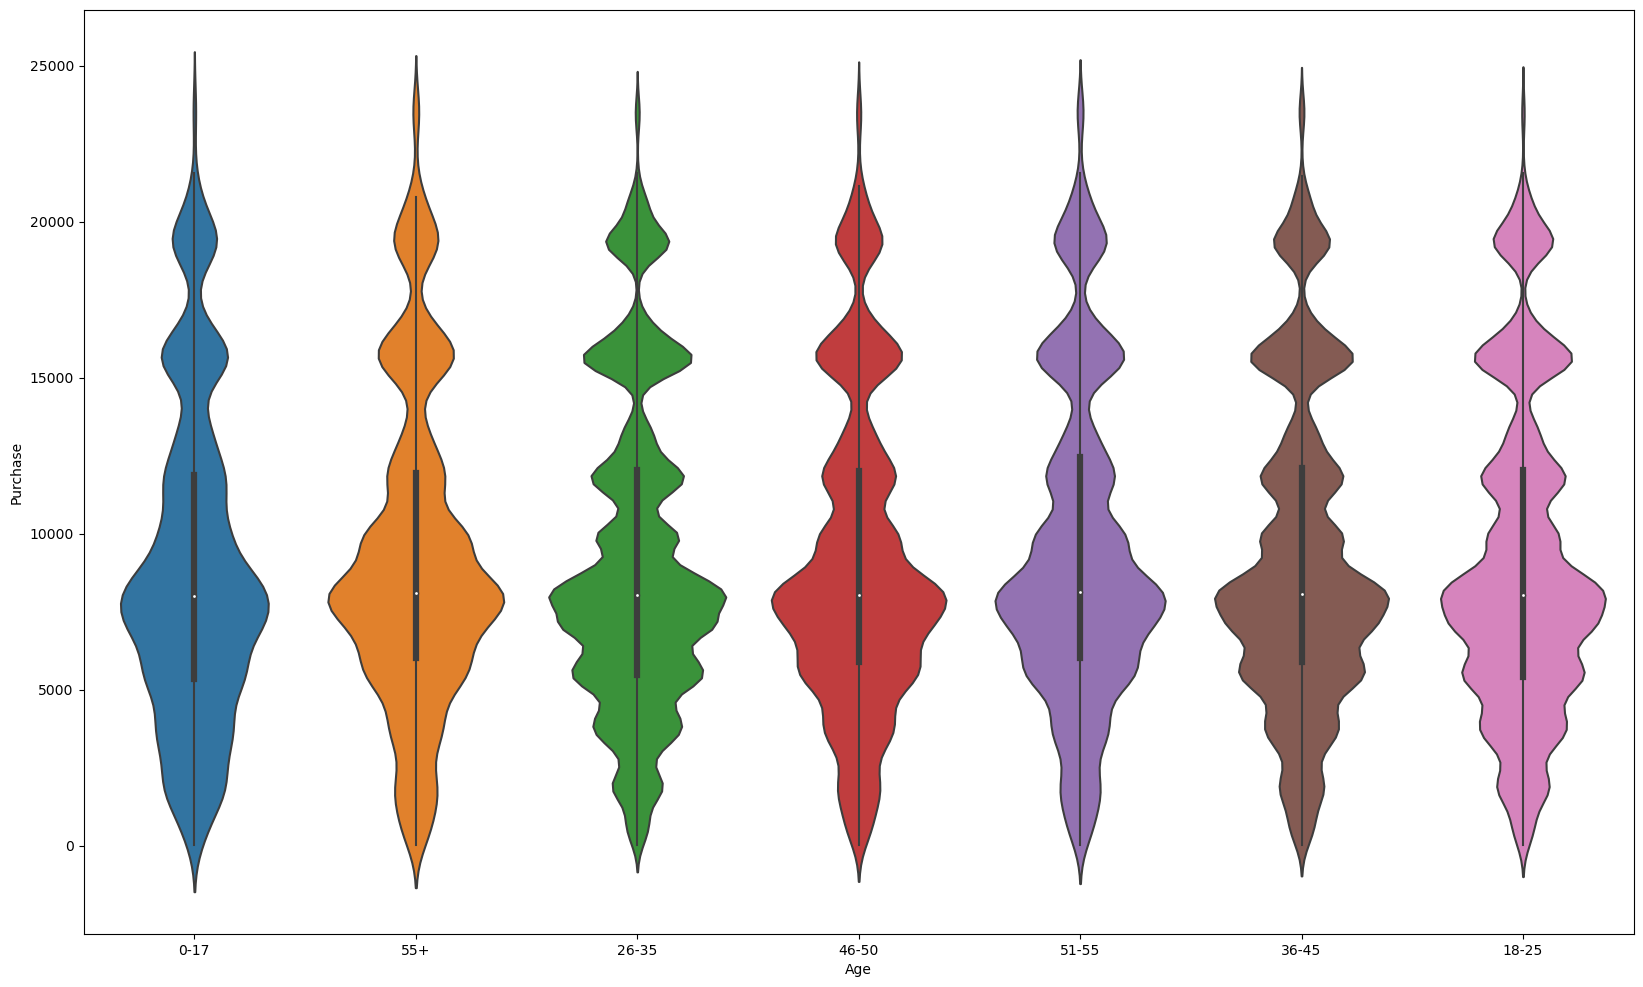

In [15]:
sns.violinplot(com['Age'],com['Purchase'])
plt.show()

In [16]:
com[['Age1','Age2']] = com.Age.str.split('-',expand=True)

com['Age1'] = com.Age1.str.strip('+').astype('float')

In [17]:
com.Age2.unique()

array(['17', None, '35', '50', '55', '45', '25'], dtype=object)

In [18]:
#Remove none
com.loc[com.Age2.isnull(),"Age2"]=55

In [19]:
com.loc[com.Age1==0,"Age2"]=17

In [20]:
# Avg age
com['Avg_age'] = com.loc[:,['Age1','Age2']].mean(axis=1)

In [22]:
com.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_age
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716,0.036934,0.036934
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.084827,0.084827
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463,0.318834,0.318834
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703,0.059118,0.059118
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918,0.055667,0.055667
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006,0.058355,0.058355
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.016296,0.016296
Age1,0.036934,0.084827,0.318834,0.059118,0.055667,0.058355,0.016296,1.000000,1.000000
Avg_age,0.036934,0.084827,0.318834,0.059118,0.055667,0.058355,0.016296,1.000000,1.000000


In [23]:
import scipy.stats as stats

teststats, pvalue = stats.ttest_ind(com.Avg_age,com.Purchase)

#Stay in current city
com.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [24]:
com['Stay_In_Current_City_Years'] = com.Stay_In_Current_City_Years.str.strip('+').astype('float')

In [25]:
com.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_cat,Age1,Age2,Avg_age
0,1000001,P00069042,F,0-17,10,A,2.0,0,3,NaN,NaN,8370.0,Others,0.0,17,0.0
1,1000001,P00248942,F,0-17,10,A,2.0,0,1,6.0,14.0,15200.0,Others,0.0,17,0.0
2,1000001,P00087842,F,0-17,10,A,2.0,0,12,NaN,NaN,1422.0,Others,0.0,17,0.0
3,1000001,P00085442,F,0-17,10,A,2.0,0,12,14.0,NaN,1057.0,Others,0.0,17,0.0
4,1000002,P00285442,M,55+,16,C,4.0,0,8,NaN,NaN,7969.0,Others,55.0,55,55.0


In [26]:
def prod_cat(x,):
    if x in [5,8,1]:
        return('Top3')
    else:
        return('Others')

In [27]:
com['Prod1'] = com.Product_Category_1.apply(prod_cat)

In [28]:
#City_Cat 

#sns.boxplot(com.City_Category,com.Purchase)

com.groupby('City_Category')['Purchase'].describe().T

City_Category,A,B,C
count,147720.000000,231173.000000,171175.000000
mean,8911.939216,9151.300563,9719.920993
std,4892.115238,4955.496566,5189.465121
min,12.000000,12.000000,12.000000
25%,5403.000000,5460.000000,6031.500000
50%,7931.000000,8005.000000,8585.000000
75%,11786.000000,11986.000000,13197.000000
max,23961.000000,23960.000000,23961.000000


In [29]:
#Take the city cat and create the mean and median of purchase
com['Mean_Tgt_City_Wise'] = com.groupby('City_Category')['Purchase'].transform('mean')

com['Median_Tgt_City_Wise'] = com.groupby('City_Category')['Purchase'].transform('median')

com['std_Tgt_City_Wise'] = com.groupby('City_Category')['Purchase'].transform('std')

In [30]:
com.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_age,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,std_Tgt_City_Wise
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.036934,0.036934,0.015785,0.010401,0.013293
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.084827,0.084827,0.036727,0.036149,0.036635
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.005416,-0.005416,0.016863,0.013177,0.015187
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.318834,0.318834,0.038985,0.036361,0.037928
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.059118,0.059118,-0.016402,-0.014246,-0.015455
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.055667,0.055667,-0.010589,-0.008975,-0.009869
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.058355,0.058355,-0.001323,-0.001077,-0.001211
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.016296,0.016296,0.063988,0.062708,0.063699
Age1,0.036934,0.084827,-0.005416,0.318834,0.059118,0.055667,0.058355,0.016296,1.000000,1.000000,0.106121,0.098648,0.103086
Avg_age,0.036934,0.084827,-0.005416,0.318834,0.059118,0.055667,0.058355,0.016296,1.000000,1.000000,0.106121,0.098648,0.103086


In [31]:
# Count of user basis product
com['Prod_Wise_User_Count'] = com.groupby('Product_ID')['User_ID'].transform('nunique')

In [32]:
com.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_age,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,std_Tgt_City_Wise,Prod_Wise_User_Count
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.036934,0.036934,0.015785,0.010401,0.013293,0.004468
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.084827,0.084827,0.036727,0.036149,0.036635,0.011603
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.005416,-0.005416,0.016863,0.013177,0.015187,0.001934
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.318834,0.318834,0.038985,0.036361,0.037928,-0.011130
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.059118,0.059118,-0.016402,-0.014246,-0.015455,-0.232861
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.055667,0.055667,-0.010589,-0.008975,-0.009869,-0.133294
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.058355,0.058355,-0.001323,-0.001077,-0.001211,-0.060464
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.016296,0.016296,0.063988,0.062708,0.063699,0.319679
Age1,0.036934,0.084827,-0.005416,0.318834,0.059118,0.055667,0.058355,0.016296,1.000000,1.000000,0.106121,0.098648,0.103086,-0.020681
Avg_age,0.036934,0.084827,-0.005416,0.318834,0.059118,0.055667,0.058355,0.016296,1.000000,1.000000,0.106121,0.098648,0.103086,-0.020681


In [33]:
#Product and product cat 1 user count
com['Prod_Cat1_User_Count'] = com.groupby('Product_Category_1')['User_ID'].transform('nunique')

In [34]:
#Purchase Stats Basis Product ID
com['Mean_Tgt_Prod_ID'] = com.groupby('Product_ID')['Purchase'].transform('mean')

com['Median_Tgt_Prod_ID'] = com.groupby('Product_ID')['Purchase'].transform('median')

com['Min_Tgt_Prod_ID'] = com.groupby('Product_ID')['Purchase'].transform('min')

com['Max_Tgt_Prod_ID'] = com.groupby('Product_ID')['Purchase'].transform('max')

com['Std_Tgt_Prod_ID'] = com.groupby('Product_ID')['Purchase'].transform('std')

In [35]:
com.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_age,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,std_Tgt_City_Wise,Prod_Wise_User_Count,Prod_Cat1_User_Count,Mean_Tgt_Prod_ID,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.036934,0.036934,0.015785,0.010401,0.013293,0.004468,-0.004643,0.006088,0.005956,0.002325,0.000092,-0.006442
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.084827,0.084827,0.036727,0.036149,0.036635,0.011603,-0.004310,0.019854,0.019313,0.017985,0.019116,0.016758
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.005416,-0.005416,0.016863,0.013177,0.015187,0.001934,0.002131,0.001146,0.001166,0.001352,0.003594,0.004391
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.318834,0.318834,0.038985,0.036361,0.037928,-0.011130,-0.009130,0.003334,0.002429,0.004886,-0.007862,-0.016393
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.059118,0.059118,-0.016402,-0.014246,-0.015455,-0.232861,-0.582848,-0.394862,-0.386475,-0.359263,-0.461568,-0.460197
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.055667,0.055667,-0.010589,-0.008975,-0.009869,-0.133294,-0.052251,-0.250626,-0.251594,-0.255925,-0.297840,-0.301987
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.058355,0.058355,-0.001323,-0.001077,-0.001211,-0.060464,0.160078,-0.028277,-0.041558,-0.029602,-0.035411,-0.028252
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.016296,0.016296,0.063988,0.062708,0.063699,0.319679,0.028031,0.849659,0.839742,0.735215,0.797802,0.699741
Age1,0.036934,0.084827,-0.005416,0.318834,0.059118,0.055667,0.058355,0.016296,1.000000,1.000000,0.106121,0.098648,0.103086,-0.020681,-0.022071,0.015867,0.013353,0.014137,-0.015830,-0.043997
Avg_age,0.036934,0.084827,-0.005416,0.318834,0.059118,0.055667,0.058355,0.016296,1.000000,1.000000,0.106121,0.098648,0.103086,-0.020681,-0.022071,0.015867,0.013353,0.014137,-0.015830,-0.043997


In [36]:
com['Magic1'] = com.groupby('User_ID')['Purchase'].transform('mean')

com['Magic2'] = com.groupby('User_ID')['Purchase'].transform('median')

com['Magic3'] = com.groupby('User_ID')['Purchase'].transform('min')

com['Magic4'] = com.groupby('User_ID')['Purchase'].transform('max')

com['Magic5'] = com.groupby('User_ID')['Purchase'].transform('std')

In [37]:
com['Prod_Age_Bins'] = com.groupby('Product_ID')['Age'].transform('nunique')

In [38]:
com.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_age,...,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID,Magic1,Magic2,Magic3,Magic4,Magic5,Prod_Age_Bins
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.036934,0.036934,...,0.005956,0.002325,0.000092,-0.006442,0.014107,0.020833,-0.011002,0.018201,0.035780,0.005111
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.084827,0.084827,...,0.019313,0.017985,0.019116,0.016758,0.064003,0.053898,-0.012964,0.019097,0.051473,0.000539
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.005416,-0.005416,...,0.001166,0.001352,0.003594,0.004391,0.017561,0.016503,0.018911,-0.013980,0.008029,0.001068
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.318834,0.318834,...,0.002429,0.004886,-0.007862,-0.016393,-0.000847,0.011550,0.015130,0.030536,-0.019182,-0.005074
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.059118,0.059118,...,-0.386475,-0.359263,-0.461568,-0.460197,-0.113473,-0.129816,-0.034221,0.043594,-0.015519,-0.094069
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.055667,0.055667,...,-0.251594,-0.255925,-0.297840,-0.301987,-0.041100,-0.052731,-0.017086,0.038608,-0.002983,-0.028719
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.058355,0.058355,...,-0.041558,-0.029602,-0.035411,-0.028252,0.033844,0.025033,-0.012696,0.039088,0.035248,0.015765
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.016296,0.016296,...,0.839742,0.735215,0.797802,0.699741,0.322415,0.296645,0.057013,0.059118,0.179935,0.105734
Age1,0.036934,0.084827,-0.005416,0.318834,0.059118,0.055667,0.058355,0.016296,1.000000,1.000000,...,0.013353,0.014137,-0.015830,-0.043997,0.051121,0.052721,0.003756,0.064885,-0.008271,0.005013
Avg_age,0.036934,0.084827,-0.005416,0.318834,0.059118,0.055667,0.058355,0.016296,1.000000,1.000000,...,0.013353,0.014137,-0.015830,-0.043997,0.051121,0.052721,0.003756,0.064885,-0.008271,0.005013


In [39]:
com.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [40]:
#Drop The Vars

new = com.drop(['User_ID','Product_ID','Age1','Age2','Product_Category_2','Product_Category_3'],axis=1)

In [41]:
new.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Product_cat,Avg_age,...,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID,Magic1,Magic2,Magic3,Magic4,Magic5,Prod_Age_Bins
0,F,0-17,10,A,2.0,0,3,8370.0,Others,0.0,...,13265.0,2648.0,13716.0,2205.413246,9545.514286,9946.0,612.0,19219.0,4639.871552,7
1,F,0-17,10,A,2.0,0,1,15200.0,Others,0.0,...,15812.0,3880.0,19701.0,3340.288874,9545.514286,9946.0,612.0,19219.0,4639.871552,7
2,F,0-17,10,A,2.0,0,12,1422.0,Others,0.0,...,1378.0,343.0,1776.0,387.331999,9545.514286,9946.0,612.0,19219.0,4639.871552,7
3,F,0-17,10,A,2.0,0,12,1057.0,Others,0.0,...,1423.0,365.0,1778.0,297.005304,9545.514286,9946.0,612.0,19219.0,4639.871552,7
4,M,55+,16,C,4.0,0,8,7969.0,Others,55.0,...,7925.0,3920.0,10073.0,1419.100393,10525.610390,9899.0,119.0,20657.0,4301.736734,7


In [42]:
new.isnull().sum()[new.isnull().sum()!=0]

Purchase              233599
Mean_Tgt_Prod_ID          61
Median_Tgt_Prod_ID        61
Min_Tgt_Prod_ID           61
Max_Tgt_Prod_ID           61
Std_Tgt_Prod_ID          272
dtype: int64

In [43]:
new.shape

(783667, 27)

In [44]:
#new.loc[new.Mean_Tgt_Prod_ID.isnull()].head()
val = new.Min_Tgt_Prod_ID.median()
new.loc[new.Min_Tgt_Prod_ID.isnull(),'Min_Tgt_Prod_ID'] = val

val1 = new.Mean_Tgt_Prod_ID.median()
new.loc[new.Mean_Tgt_Prod_ID.isnull(),'Mean_Tgt_Prod_ID'] = val1

val2 = new.Median_Tgt_Prod_ID.median()
new.loc[new.Median_Tgt_Prod_ID.isnull(),'Median_Tgt_Prod_ID'] = val2

val3 = new.Max_Tgt_Prod_ID.median()
new.loc[new.Max_Tgt_Prod_ID.isnull(),'Max_Tgt_Prod_ID'] = val3

val4 = new.Std_Tgt_Prod_ID.median()
new.loc[new.Std_Tgt_Prod_ID.isnull(),'Std_Tgt_Prod_ID'] = val4

In [45]:
new.isnull().sum()[new.isnull().sum()!=0]

Purchase    233599
dtype: int64

In [60]:
new.shape

(783667, 27)

<AxesSubplot:>

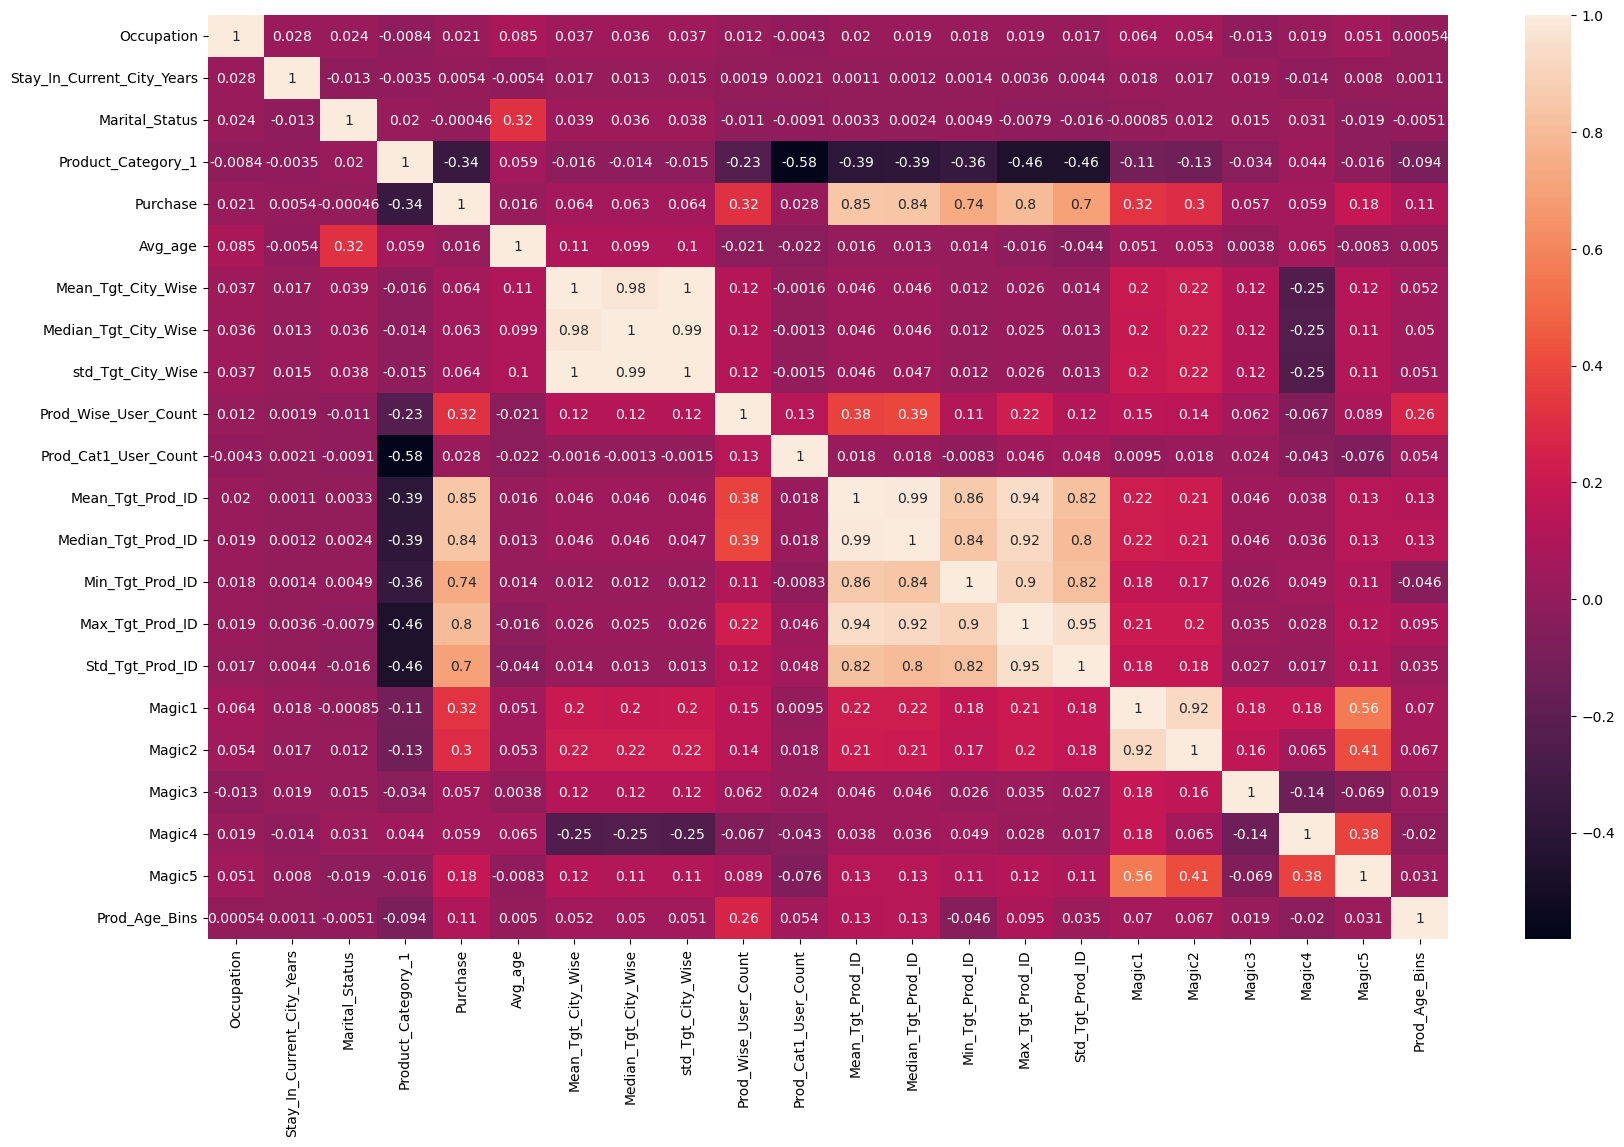

In [46]:
sns.heatmap(new.corr(),annot=True)

In [47]:
#Split the data in Train and test
newtrain = new.iloc[0:train.shape[0]-1,:]
newtest = new.iloc[train.shape[0]:,:]
newtrain.shape,newtest.shape,train.shape,test.shape

((550067, 27), (233599, 27), (550068, 12), (233599, 11))

In [48]:
#Drop purchase from newtest
newtest.drop('Purchase',axis=1,inplace=True)

In [49]:
newtrain.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [50]:
#Drop the age from newtrain and newtest
newtest.drop('Age',axis=1,inplace=True)
newtrain.drop('Age',axis=1,inplace=True)

In [51]:
from sklearn.preprocessing import StandardScaler
X = newtrain.drop('Purchase',axis=1)
y = newtrain.Purchase

In [52]:
X.select_dtypes(include=np.number).columns

num_cols = ['Avg_age', 'Mean_Tgt_City_Wise',
       'Median_Tgt_City_Wise', 'std_Tgt_City_Wise', 'Prod_Wise_User_Count',
       'Prod_Cat1_User_Count', 'Mean_Tgt_Prod_ID', 'Median_Tgt_Prod_ID',
       'Min_Tgt_Prod_ID', 'Max_Tgt_Prod_ID', 'Std_Tgt_Prod_ID', 'Magic1',
       'Magic2', 'Magic3', 'Magic4', 'Magic5']

In [53]:
len(num_cols)

16

In [54]:
ss = StandardScaler()
for i in num_cols:
    X.loc[:,i] = ss.fit_transform(pd.DataFrame(newtrain.loc[:,i]))
    newtest.loc[:,i] = ss.transform(pd.DataFrame(newtest.loc[:,i]))

In [55]:
#One Hot encoding
dummytrain = pd.get_dummies(X,drop_first=True)
dummytest = pd.get_dummies(newtest,drop_first=True)

In [56]:
dummytrain.shape,dummytest.shape

((550067, 26), (233599, 26))

## Modeling

In [57]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

In [58]:
kfold = KFold(n_splits=5,shuffle= True,random_state = 0)
lr = LinearRegression()
pred = []
for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(dummytest))

finalpred = pd.DataFrame(pred).T.mean(axis=1)
sub = pd.DataFrame({'Purchase':finalpred,
                   "User_ID":test.User_ID,
                   'Product_ID':test.Product_ID})
sub.to_csv('Fridaylr.csv',index=False)  #2597